In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()

In [4]:
K=len(set(y_test))
print("Number of classses: ",K)

Number of classses:  10


In [5]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size


In [8]:
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/15
1562/1562 [==============================] - 24s 16ms/step - loss: 1.4404 - accuracy: 0.4876 - val_loss: 1.1296 - val_accuracy: 0.6092
Epoch 2/15
1562/1562 [==============================] - 20s 13ms/step - loss: 1.0467 - accuracy: 0.6298 - val_loss: 0.9239 - val_accuracy: 0.6782
Epoch 3/15
1562/1562 [==============================] - 20s 13ms/step - loss: 0.9153 - accuracy: 0.6801 - val_loss: 0.8821 - val_accuracy: 0.6930
Epoch 4/15
1562/1562 [==============================] - 20s 13ms/step - loss: 0.8317 - accuracy: 0.7078 - val_loss: 0.7303 - val_accuracy: 0.7449
Epoch 5/15
1562/1562 [==============================] - 20s 13ms/step - loss: 0.7844 - accuracy: 0.7265 - val_loss: 0.8589 - val_accuracy: 0.7068
Epoch 6/15
1562/1562 [==============================] - 20s 13ms/step - loss: 0.7322 - accuracy: 0.7446 - val_loss: 0.795

In [9]:
print("Training result: ",model.evaluate(x_train,y_train))
print("Testing result: ",model.evaluate(x_test,y_test))

50000/50000 [==============================] - 6s 127us/sample - loss: 0.4100 - accuracy: 0.8591
Training result:  [0.40997616572380063, 0.85912]
10000/10000 [==============================] - 1s 107us/sample - loss: 0.5249 - accuracy: 0.8169
Testing result:  [0.5248605719089509, 0.8169]


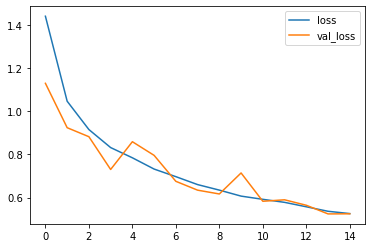

In [10]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

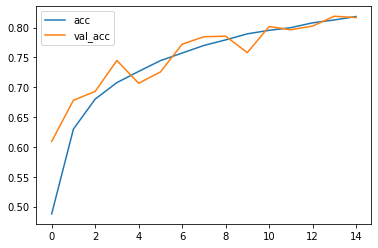

In [11]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248  